In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation,Dropout
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt


In [3]:
DATA_PATH = "/content/drive/MyDrive/Group09 Dataset/"

In [4]:
train_datagen = ImageDataGenerator( # https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
  rescale = 1./255,#will convert the pixels in range [0,255] to range [0,1].
  shear_range=0.1, #slant
  rotation_range=5, 
  zoom_range = 0.1,
  width_shift_range=0.1, 
  height_shift_range=0.1, 
  #horizontal_flip=True,
  #vertical_flip=False
)

test_datagen = ImageDataGenerator(
   rescale = 1./255 
)

In [5]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory
train_data = train_datagen.flow_from_directory(#Keras' ImageDataGenerator class allows the users to perform image augmentation while training the model
  DATA_PATH+'train',
  target_size = (224, 224),# the size of your input images.
  color_mode = 'rgb',
  classes = ['Dorje', 'Rosary','Mikky offering bowl', 'Incense burner','Butter lamp','Bumpa','Unknown'],
  class_mode = 'categorical', #2=binary
  batch_size = 32, #the number of training images utilized in one iteration
  shuffle = True #
)

test_data = test_datagen.flow_from_directory(
  DATA_PATH+'test',
  target_size = (224, 224),#same size like train
  color_mode = 'rgb',
  classes = ['Dorje', 'Rosary','Mikky offering bowl', 'Incense burner','Butter lamp','Bumpa','Unknown'],
  class_mode = 'categorical',
  batch_size = 32,
)

Found 3745 images belonging to 7 classes.
Found 851 images belonging to 7 classes.


In [6]:
classes={0:'Dorje', 1:'Rosary', 2:'Mikky offering bowl', 3:'Incense burner', 4:'Butter lamp', 5:'Bumpa',6:'Unknown'}

In [7]:
model = Sequential()
#adding 
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation ='relu', input_shape = (224, 224, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

    
model.add(Conv2D(filters =128, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Activation('relu'))
model.add(Dense(7, activation = "softmax"))#


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [9]:
# Model Callback - Stop the training when no learning is taking place
early_stop = EarlyStopping(monitor='val_loss', patience=5)#loss decrease and train increase
callbacks_list = [early_stop]

In [10]:
# Compile the model
model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
history = model.fit(
    train_data,
    # Number of batches for tra ining
    steps_per_epoch = len(train_data),
    validation_data = test_data,   
    # Number of batches for testing
    validation_steps = len(test_data),
    batch_size=32,
    epochs = 70,
    callbacks = callbacks_list,
)

Epoch 1/70
118/118 [==============================] - 1339s 11s/step - loss: 1.9238 - accuracy: 0.2051 - val_loss: 1.9158 - val_accuracy: 0.2221
Epoch 2/70
118/118 [==============================] - 94s 801ms/step - loss: 1.8814 - accuracy: 0.2449 - val_loss: 1.8497 - val_accuracy: 0.2456
Epoch 3/70
118/118 [==============================] - 93s 789ms/step - loss: 1.7935 - accuracy: 0.2977 - val_loss: 1.7983 - val_accuracy: 0.3173
Epoch 4/70
118/118 [==============================] - 93s 789ms/step - loss: 1.6927 - accuracy: 0.3551 - val_loss: 1.6343 - val_accuracy: 0.3760
Epoch 5/70
118/118 [==============================] - 94s 799ms/step - loss: 1.5384 - accuracy: 0.4283 - val_loss: 1.4147 - val_accuracy: 0.4571
Epoch 6/70
118/118 [==============================] - 93s 790ms/step - loss: 1.3930 - accuracy: 0.4785 - val_loss: 1.2571 - val_accuracy: 0.5358
Epoch 7/70
118/118 [==============================] - 93s 786ms/step - loss: 1.3641 - accuracy: 0.5154 - val_loss: 1.2948 - val_ac

In [12]:
print("[INFO] accuracies....") 
# Train accuracy
scores = model.evaluate(train_data, steps=len(train_data), verbose=1)
print("Train Accuracy: %.2f%%" % (scores[1]*100))

# Test accuracy
scores = model.evaluate(test_data, steps=len(test_data), verbose=1)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

[INFO] accuracies....
118/118 [==============================] - 80s 676ms/step - loss: 0.2668 - accuracy: 0.9127
Train Accuracy: 91.27%
27/27 [==============================] - 12s 422ms/step - loss: 0.2818 - accuracy: 0.9048
Test Accuracy: 90.48%


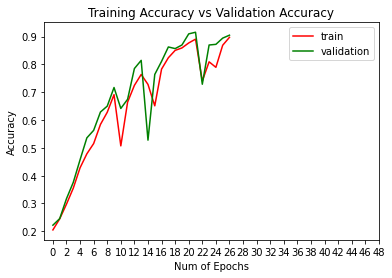

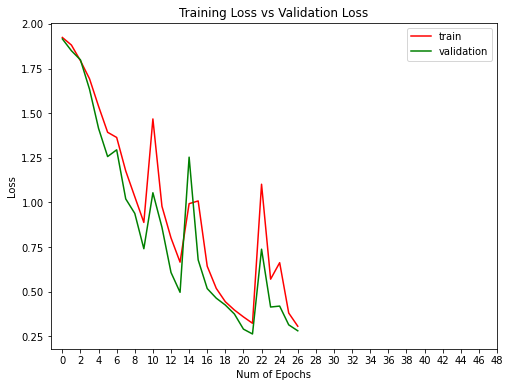

In [13]:
import numpy as np
plt.figure(0)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'g')
plt.xticks(np.arange(0, 50, 2))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0,50, 2))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

[INFO] evaluating the model...
                     precision    recall  f1-score   support

              Dorje       0.03      0.03      0.03        60
             Rosary       0.14      0.13      0.13       113
Mikky offering bowl       0.17      0.17      0.17       169
     Incense burner       0.10      0.11      0.11       109
        Butter lamp       0.15      0.15      0.15       123
              Bumpa       0.18      0.19      0.18       134
            Unknown       0.17      0.13      0.15       143

           accuracy                           0.14       851
          macro avg       0.13      0.13      0.13       851
       weighted avg       0.14      0.14      0.14       851



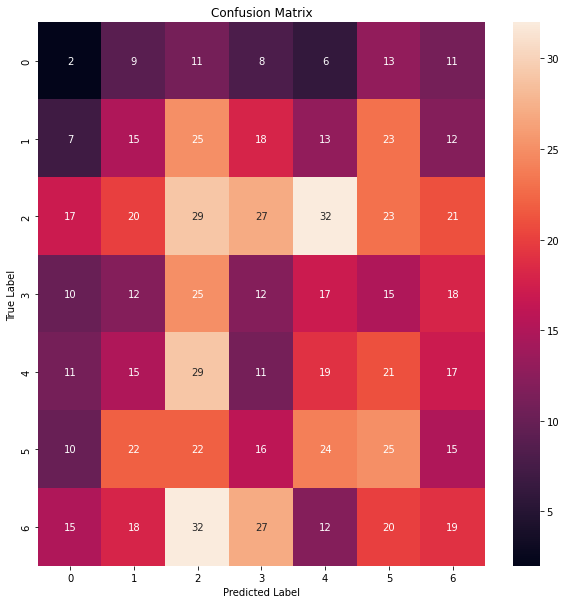

In [14]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
%matplotlib inline

# Reset the validation generator and evaluate the network after fine-tuning just the network head
print("[INFO] evaluating the model...")
test_data.reset()
plt.figure(figsize=(10,10))
predIdxs = model.predict(test_data, steps = len(test_data))
predIdxs = np.argmax(predIdxs, axis=1)
matrix = confusion_matrix(test_data.classes, predIdxs)
sns.heatmap(matrix, annot=True, cbar=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print(classification_report(test_data.classes, predIdxs, target_names=test_data.class_indices.keys()))

In [15]:
# In Tensorflow
model.save('/content/drive/MyDrive/model/finalmodeldor.h5') # Saves the entire model to a single artifact

In [16]:
model2=load_model('/content/drive/MyDrive/model/finalmodeldor.h5')

In [55]:
#prediction
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow
img_pred = image.load_img('/content/drive/MyDrive/missclassify/t1.jpg', target_size=(224, 224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)
img_pred /255

prediction=model2.predict(img_pred)
print(prediction)

[[0. 0. 0. 0. 0. 0. 1.]]


In [56]:
list_index=[0,1,2,3,4,5,6]
x=prediction

for i in range(7):
  for j in range(7):
    if x[0][list_index[i]] > x[0][list_index[j]]: 
      temp = list_index[i] 
      list_index[i]= list_index[j]
      list_index[j]=temp

print(list_index)  

[6, 1, 2, 3, 4, 5, 0]


In [57]:
for i in range(1):
  print(classes[list_index[i]], ':', round(prediction[0][list_index[i]]*100,2), '%')

Unknown : 100.0 %


In [27]:
import tensorflow
print(tensorflow.__version__)

2.8.2
